In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pysta

In [2]:
cluster_combined = pd.read_csv('cluster_combined_dim2_spd4.csv')

ratio12 = cluster_combined["weight1"] / cluster_combined["weight2"]
ratio21 = cluster_combined["weight2"] / cluster_combined["weight1"]
cluster_combined["ratio"] = np.maximum(np.array(ratio12), np.array(ratio21))

cluster_combined

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined,ratio
0,14a,5973,ON,25.775064,0.620785,0.571746,0.562778,True,25.702134,15.884281,0.598530,0.401470,-0.206751,20180618,True,ON/OFF,1.490846
1,17a,5929,unknown,8.452868,0.436700,0.434049,0.430598,True,6.269053,5.988208,0.504045,0.495955,-0.251180,20180618,False,unknown,1.016313
2,17b,2553,unknown,8.515376,0.570595,0.559954,0.552507,True,5.333542,5.551068,0.495539,0.504461,-0.268871,20180618,False,unknown,1.018004
3,23a,12115,OFF,22.562123,0.604328,0.517577,0.516272,True,20.522708,11.367329,0.602274,0.397726,-0.002242,20180618,False,OFF,1.514293
4,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618,True,ON/OFF,1.111261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,82b,2842,OFF,15.507029,0.798825,0.714066,0.700224,True,14.167554,5.978526,0.597454,0.402546,-0.185087,20180626,False,OFF,1.484186
167,83a,17646,OFF,20.351671,0.493440,0.462766,0.458015,True,6.770738,17.624590,0.493222,0.506778,-0.096240,20180626,False,OFF,1.027485
168,86a,3186,ON,19.576154,0.952703,0.766365,0.749286,True,9.892318,19.695189,0.276750,0.723250,0.588351,20180626,False,ON,2.613363
169,87a,9120,OFF,21.676952,0.590420,0.517161,0.512286,True,19.043271,14.230278,0.600327,0.399673,0.056832,20180626,False,OFF,1.502046


## PSNRs of ON/OFF cells

In [3]:
idx_on_off = cluster_combined["cell_type_combined"] == "ON/OFF"
np.sum(idx_on_off)

23

15.923965042618388 5.443759114637222
16.21886081551253 4.534429731240866
6.267734998652674 25.77506391779178
8.637062516437712 25.86975768114652


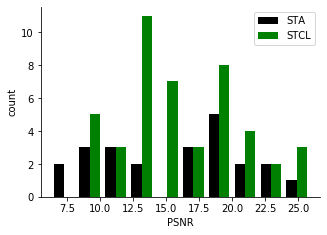

In [4]:
#cluster_combined.loc[idx_on_off].hist(["PSNR", "PSNR1", "PSNR2"])

PSNR = cluster_combined.loc[idx_on_off,"PSNR"]
PSNR1 = cluster_combined.loc[idx_on_off,"PSNR1"]
PSNR2 = cluster_combined.loc[idx_on_off,"PSNR2"]

# PSNR_max = np.maximum(PSNR1,PSNR2)
# PSNR_min = np.minimum(PSNR1,PSNR2)
 
PSNRs = np.hstack([PSNR1, PSNR2])

print(np.mean(PSNR), np.std(PSNR))
print(np.mean(PSNRs), np.std(PSNRs))

print(np.min(PSNR), np.max(PSNR))
print(np.min(PSNRs), np.max(PSNRs))


plt.figure(figsize=(5,3.5))

plt.hist([PSNR, PSNRs], color=['k','g'])
# plt.hist([PSNR, PSNRs], density=True, color=['k','g'])
plt.legend(["STA", "STCL"])
plt.xlabel("PSNR")
plt.ylabel("count")
# plt.ylabel("frequency")

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("on_and_off_PSNRs.png")
plt.savefig("on_and_off_PSNRs.pdf")

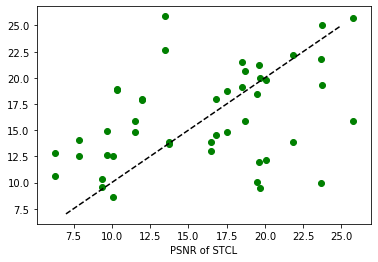

In [5]:
# PSNR does not always increse (due to minor responses)
plt.scatter(PSNR,PSNR1, c='g')
plt.scatter(PSNR,PSNR2, c='g')
plt.xlabel('PSNR of STA')
plt.xlabel('PSNR of STCL')
plt.plot([7,25],[7,25],'k--')

(0.5000000000000001, 0.07704005707136381)

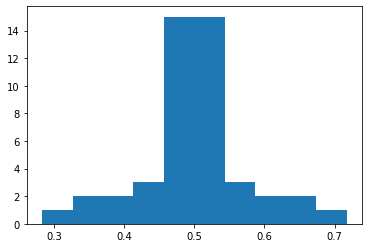

In [6]:
# how about weights?
weight1 = cluster_combined.loc[idx_on_off,"weight1"]
weight2 = cluster_combined.loc[idx_on_off,"weight2"]

weights = np.hstack([weight1,weight2])

plt.hist(weights)

np.mean(weights), np.std(weights)

# weight_max = np.maximum(weight1,weight2)

# plt.hist(weight_max)

# np.mean(weight_max), np.std(weight_max)

In [7]:
## ON -> ON/OFF
idx_on = cluster_combined["cell_type"] == "ON"
idx_from_on = (cluster_combined["cell_type"] == "ON") & (cluster_combined["cell_type_combined"] == "ON/OFF")

idx_off = cluster_combined["cell_type"] == "OFF"
idx_from_off = (cluster_combined["cell_type"] == "OFF") & (cluster_combined["cell_type_combined"] == "ON/OFF")

cluster_on = cluster_combined.loc[idx_on]
cluster_off = cluster_combined.loc[idx_off]
cluster_from_on = cluster_combined.loc[idx_from_on]
cluster_from_off = cluster_combined.loc[idx_from_off]

print(len(cluster_on), len(cluster_off))
print(len(cluster_from_on), len(cluster_from_off))

48 84
13 5


5491.6875 3858.8064418398994
8434.559523809523 5779.363854498114


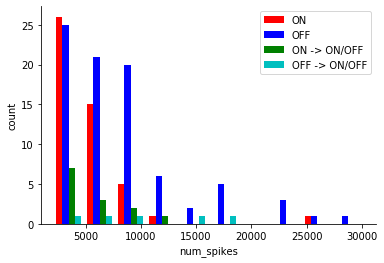

In [8]:

def compare(col_name, bins=None):
#     plt.figure()
#     plt.hist([cluster_on[col_name], cluster_off[col_name]], bins)
#     plt.legend(['ON', 'OFF'])
#     plt.ylabel('count')

#     plt.figure()
#     plt.hist([cluster_from_on[col_name], cluster_from_off[col_name]], bins)
#     plt.legend(['ON -> ON/OFF', 'OFF -> ON/OFF'])
#     plt.ylabel('count')

    plt.figure()
    plt.hist([cluster_on[col_name], cluster_off[col_name], cluster_from_on[col_name], cluster_from_off[col_name]], bins,
             color=['r','b','g','c'])
    plt.legend(['ON', 'OFF', 'ON -> ON/OFF', 'OFF -> ON/OFF'])
    plt.ylabel('count')

    plt.xlabel(col_name)


print(cluster_on['num_spikes'].mean(), cluster_on['num_spikes'].std())
print(cluster_off['num_spikes'].mean(), cluster_off['num_spikes'].std())

compare("num_spikes")


# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("num_spikes.png")

17.9458063207659 4.323107139938439
19.986749100751613 3.620396166151057


([<matplotlib.axis.YTick at 0x1a2500bd90>,
 <a list of 5 Text yticklabel objects>)

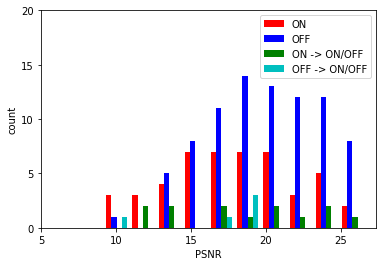

In [9]:
print(cluster_on['PSNR'].mean(), cluster_on['PSNR'].std())
print(cluster_off['PSNR'].mean(), cluster_off['PSNR'].std())

compare("PSNR")

plt.xticks([5, 10, 15, 20, 25])
plt.yticks([0, 5, 10, 15, 20])

# plt.legend(loc="upper left")

## start from found ON/OFF cells

In [14]:
idx_on_and_off = cluster_combined["cell_type_combined"] == "ON/OFF"
idx_from_on = (cluster_combined["cell_type"] == "ON") & idx_on_and_off 
idx_from_off = (cluster_combined["cell_type"] == "OFF") & idx_on_and_off 
idx_from_unknown = (cluster_combined["cell_type"] == "unknown") & idx_on_and_off 

cluster_on_and_off = cluster_combined.loc[idx_on_and_off]
cluster_from_on = cluster_combined.loc[idx_from_on]
cluster_from_off = cluster_combined.loc[idx_from_off]
cluster_from_unknown = cluster_combined.loc[idx_from_unknown]

print(len(cluster_on_and_off))
print(len(cluster_from_on), len(cluster_from_off), len(cluster_from_unknown))

23
13 5 5


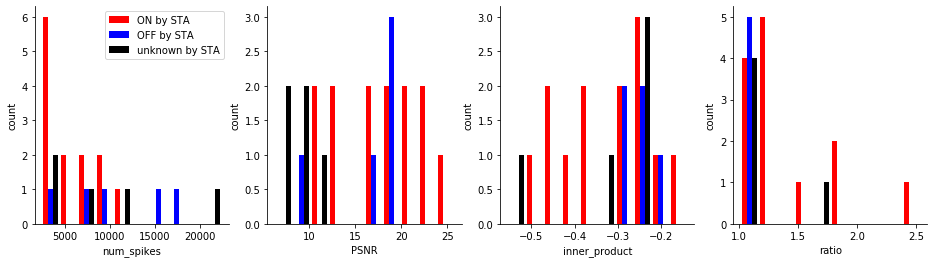

In [15]:

def compare_source_of_unknown(col_name, bins=None, ):
#     plt.figure()
#     plt.hist([cluster_on[col_name], cluster_off[col_name]], bins)
#     plt.legend(['ON', 'OFF'])
#     plt.ylabel('count')

#     plt.figure()
#     plt.hist([cluster_from_on[col_name], cluster_from_off[col_name]], bins)
#     plt.legend(['ON -> ON/OFF', 'OFF -> ON/OFF'])
#     plt.ylabel('count')

    plt.hist([cluster_from_on[col_name], cluster_from_off[col_name], cluster_from_unknown[col_name]],
             bins,
             color=['r','b','k'])
    plt.legend(['ON by STA', 'OFF by STA', 'unknown by STA'])
    plt.ylabel('count')

    plt.xlabel(col_name)
    
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)



# print(cluster_on['num_spikes'].mean(), cluster_on['num_spikes'].std())
# print(cluster_off['num_spikes'].mean(), cluster_off['num_spikes'].std())

# plt.figure(figsize=(10,8))
plt.figure(figsize=(16,4))
plt.subplot(141)
compare_source_of_unknown("num_spikes")

# plt.figure()
plt.subplot(142)
compare_source_of_unknown("PSNR")
plt.legend('',frameon=False)

plt.subplot(143)
# plt.figure()
compare_source_of_unknown("inner_product")
plt.legend('',frameon=False)

plt.subplot(144)
# plt.figure()
compare_source_of_unknown("ratio")
plt.legend('',frameon=False)

plt.savefig("on_and_off.png")
plt.savefig("on_and_off.pdf")

In [70]:
def compare_source_of_unknown_multiple_columns(col_names, bins=None):
#     plt.figure()
#     plt.hist([cluster_on[col_name], cluster_off[col_name]], bins)
#     plt.legend(['ON', 'OFF'])
#     plt.ylabel('count')

#     plt.figure()
#     plt.hist([cluster_from_on[col_name], cluster_from_off[col_name]], bins)
#     plt.legend(['ON -> ON/OFF', 'OFF -> ON/OFF'])
#     plt.ylabel('count')

    on = []
    off = []
    unknown = []
    for c in col_names:
        on.extend(cluster_from_on[c])
        off.extend(cluster_from_off[c])
        unknown.extend(cluster_from_unknown[c])
        
    plt.hist([on, off, unknown],
             bins,
             color = ['r','b','k'])
             #color=[(0.7,0,0),(0,0.3,0.8),(0.3,0.3,0.3)])
    plt.legend(['ON by STA', 'OFF by STA', 'unknown by STA'])
    plt.ylabel('count')

#     plt.xlabel(col_name)
    
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

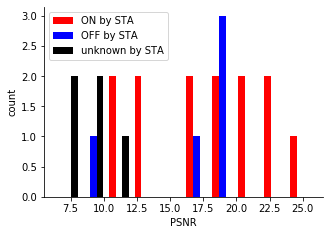

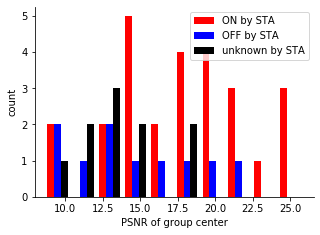

In [71]:
plt.figure(figsize=(5,3.5))
compare_source_of_unknown("PSNR")

plt.figure(figsize=(5,3.5))
compare_source_of_unknown_multiple_columns(["PSNR1", "PSNR2"])

plt.xlabel('PSNR of group center')
plt.savefig('PSNR_centers_by_STA_labels.pdf')
plt.savefig('PSNR_centers_by_STA_labels.png')

In [12]:
cluster_from_on

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined,ratio
0,14a,5973,ON,25.775064,0.620785,0.571746,0.562778,True,25.702134,15.884281,0.598530,0.401470,-0.206751,20180618,True,ON/OFF,1.490846
4,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618,True,ON/OFF,1.111261
11,32b,3530,ON,16.838700,0.862429,0.749463,0.716215,True,17.936124,14.497231,0.647646,0.352354,-0.449921,20180618,True,ON/OFF,1.838057
14,34b,4208,ON,18.520772,0.706069,0.597161,0.588002,True,21.493398,19.136803,0.566473,0.433527,-0.375909,20180618,True,ON/OFF,1.306659
15,35a,9638,ON,13.477084,0.665520,0.552200,0.548982,True,25.869758,22.670575,0.553304,0.446696,-0.437553,20180618,True,ON/OFF,1.238658
32,54d,2966,ON,19.675728,0.927184,0.759760,0.752497,True,9.463352,19.956145,0.283012,0.716988,-0.260261,20180618,True,ON/OFF,2.533423
72,26c,6699,ON,20.090976,0.498963,0.470083,0.461593,True,19.790906,12.163867,0.533108,0.466892,-0.267992,20180621,True,ON/OFF,1.141822
78,32a,11842,ON,23.692912,0.544881,0.489408,0.483369,True,21.754861,9.931059,0.523884,0.476116,-0.237349,20180621,True,ON/OFF,1.100327
96,42b,8472,ON,21.819161,0.567641,0.502737,0.496190,True,22.212132,13.903167,0.540581,0.459419,-0.278880,20180621,True,ON/OFF,1.176662
117,85b,4002,ON,11.494061,0.678136,0.597015,0.581718,True,15.846811,14.866739,0.515823,0.484177,-0.394200,20180621,True,ON/OFF,1.065360


Text(0, 0.5, 'count')

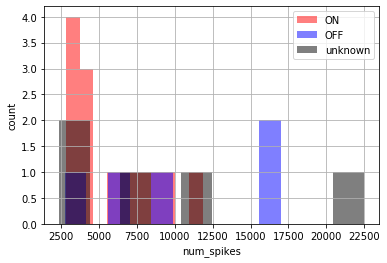

In [13]:


from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rbkgcmy')

group_keys=["ON", "OFF", "unknown"]
#col_name = "PSNR"
col_name = "num_spikes"

cluster_on_and_off.groupby("cell_type", group_keys=["ON", "OFF", "unknown"], sort=False)[col_name].hist(alpha=0.5)
plt.legend(group_keys)
plt.xlabel(col_name)
plt.ylabel("count")